<a href="https://colab.research.google.com/github/VitorTakiuti/Heat-map-of-ofidic-acidents-in-Brazil-created-with-Python/blob/main/Mapa_de_Calor_do_Brasil_Acidentes_Of%C3%ADdicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-bbf6372ee241>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')  # Mapa de cores (Yellow-Orange-Red)


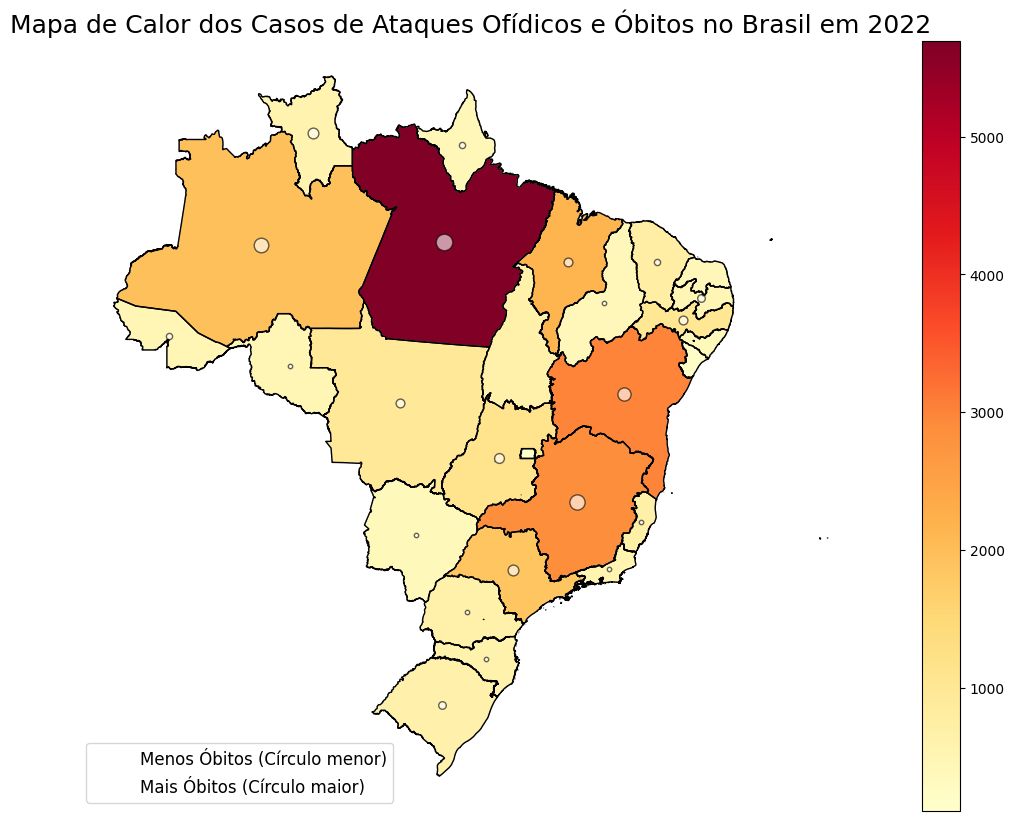

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.lines import Line2D

# Carregar os dados do arquivo Excel
excel_file = '/content/Brasil Shape/Casos e óbitos.xlsx'
sheet_name = '2022'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Carregar o shapefile do Brasil
brasil_shapefile = '/content/Brasil Shape'  # Substitua pelo caminho do seu shapefile
gdf = gpd.read_file(brasil_shapefile)

# Mergir os dados com o shapefile

merged = gdf.set_index('NM_UF').join(df.set_index('Estado'))

# Definir as cores para o mapa de calor
norm = Normalize(vmin=merged['Casos'].min(), vmax=merged['Casos'].max())
cmap = get_cmap('YlOrRd')  # Mapa de cores (Yellow-Orange-Red)

# Criar a figura e o eixo
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotar o mapa de calor
merged.plot(column='Casos', ax=ax, cmap=cmap, linewidth=0.8, edgecolor='0.8', legend=True, norm=norm)

# Adicionar os círculos para os óbitos
for idx, row in merged.iterrows():
    if row['Óbitos'] > 0:
        ax.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y,
                   s=row['Óbitos'] * 10,  # Ajuste o fator de escala conforme necessário
                   color='white', edgecolor='black', alpha=0.6, zorder=5)

# Adicionar divisões geográficas das regiões
# Definir os contornos das regiões
region_boundaries = {
    'Norte': ['Acre', 'Amazonas', 'Amapá', 'Pará', 'Roraima', 'Rondônia', 'Tocantins'],
    'Nordeste': ['Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe', 'Alagoas'],
    'Centro-Oeste': ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Adicionar os contornos das regiões
for region, states in region_boundaries.items():
    region_gdf = gdf[gdf['NM_UF'].isin(states)]
    region_gdf.boundary.plot(ax=ax, color='black', linewidth=1)

# Ajustar título e legendas
plt.title('Mapa de Calor dos Casos de Ataques Ofídicos e Óbitos no Brasil em 2022', fontsize=18)
plt.xlabel('')
plt.ylabel('')

# Ajustar a legenda
legend = ax.get_legend()
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=5, label='Menos Óbitos (Círculo menor)'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=15, label='Mais Óbitos (Círculo maior)')]

ax.legend(handles=legend_elements, loc='lower left', fontsize=12)


# Remover a borda do gráfico e eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Exibir o mapa
plt.show()


<ipython-input-8-6f1fcb66d653>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')  # Mapa de cores (Yellow-Orange-Red)


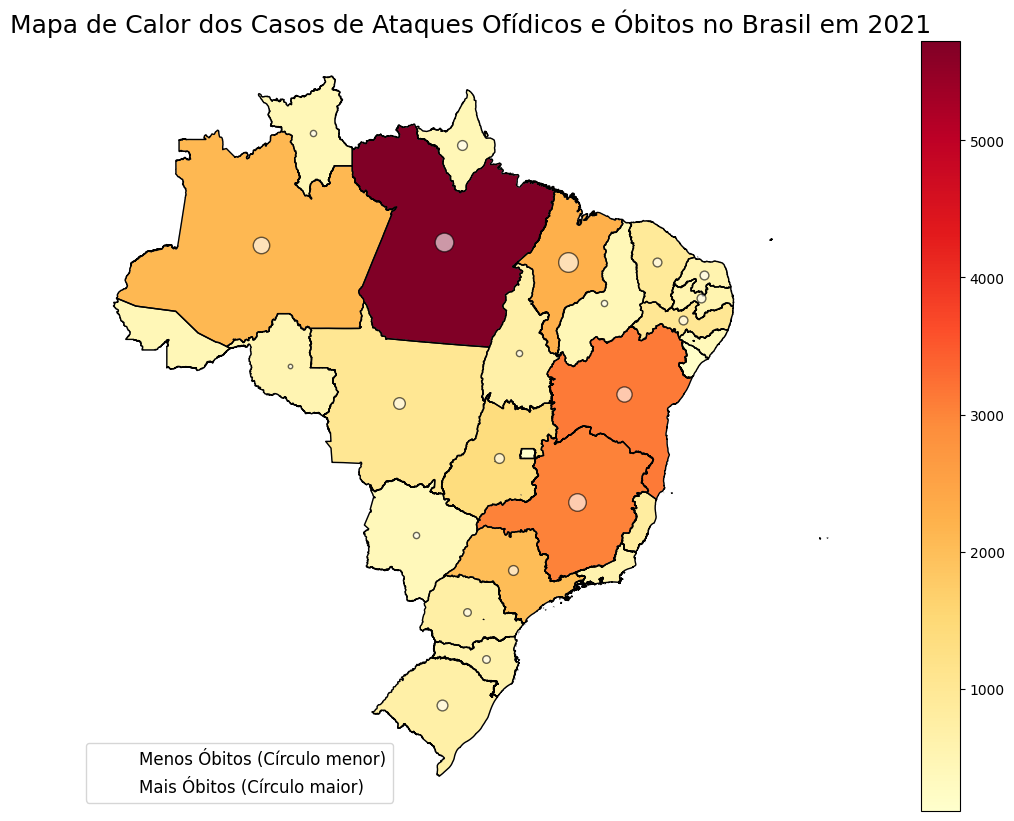

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.lines import Line2D

# Carregar os dados do arquivo Excel
excel_file = '/content/Brasil Shape/Casos e óbitos.xlsx'
sheet_name = '2021'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Carregar o shapefile do Brasil
brasil_shapefile = '/content/Brasil Shape'  # Substitua pelo caminho do seu shapefile
gdf = gpd.read_file(brasil_shapefile)

# Mergir os dados com o shapefile

merged = gdf.set_index('NM_UF').join(df.set_index('Estado'))

# Definir as cores para o mapa de calor
norm = Normalize(vmin=merged['Casos'].min(), vmax=merged['Casos'].max())
cmap = get_cmap('YlOrRd')  # Mapa de cores (Yellow-Orange-Red)

# Criar a figura e o eixo
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotar o mapa de calor
merged.plot(column='Casos', ax=ax, cmap=cmap, linewidth=0.8, edgecolor='0.8', legend=True, norm=norm)

# Adicionar os círculos para os óbitos
for idx, row in merged.iterrows():
    if row['Óbitos'] > 0:
        ax.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y,
                   s=row['Óbitos'] * 10,  # Ajuste o fator de escala conforme necessário
                   color='white', edgecolor='black', alpha=0.6, zorder=5)

# Adicionar divisões geográficas das regiões
# Definir os contornos das regiões
region_boundaries = {
    'Norte': ['Acre', 'Amazonas', 'Amapá', 'Pará', 'Roraima', 'Rondônia', 'Tocantins'],
    'Nordeste': ['Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe', 'Alagoas'],
    'Centro-Oeste': ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Adicionar os contornos das regiões
for region, states in region_boundaries.items():
    region_gdf = gdf[gdf['NM_UF'].isin(states)]
    region_gdf.boundary.plot(ax=ax, color='black', linewidth=1)

# Ajustar título e legendas
plt.title('Mapa de Calor dos Casos de Ataques Ofídicos e Óbitos no Brasil em 2021', fontsize=18)
plt.xlabel('')
plt.ylabel('')

# Ajustar a legenda
legend = ax.get_legend()
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=5, label='Menos Óbitos (Círculo menor)'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=15, label='Mais Óbitos (Círculo maior)')]

ax.legend(handles=legend_elements, loc='lower left', fontsize=12)


# Remover a borda do gráfico e eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Exibir o mapa
plt.show()


<ipython-input-9-b7ed149896b6>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('YlOrRd')  # Mapa de cores (Yellow-Orange-Red)


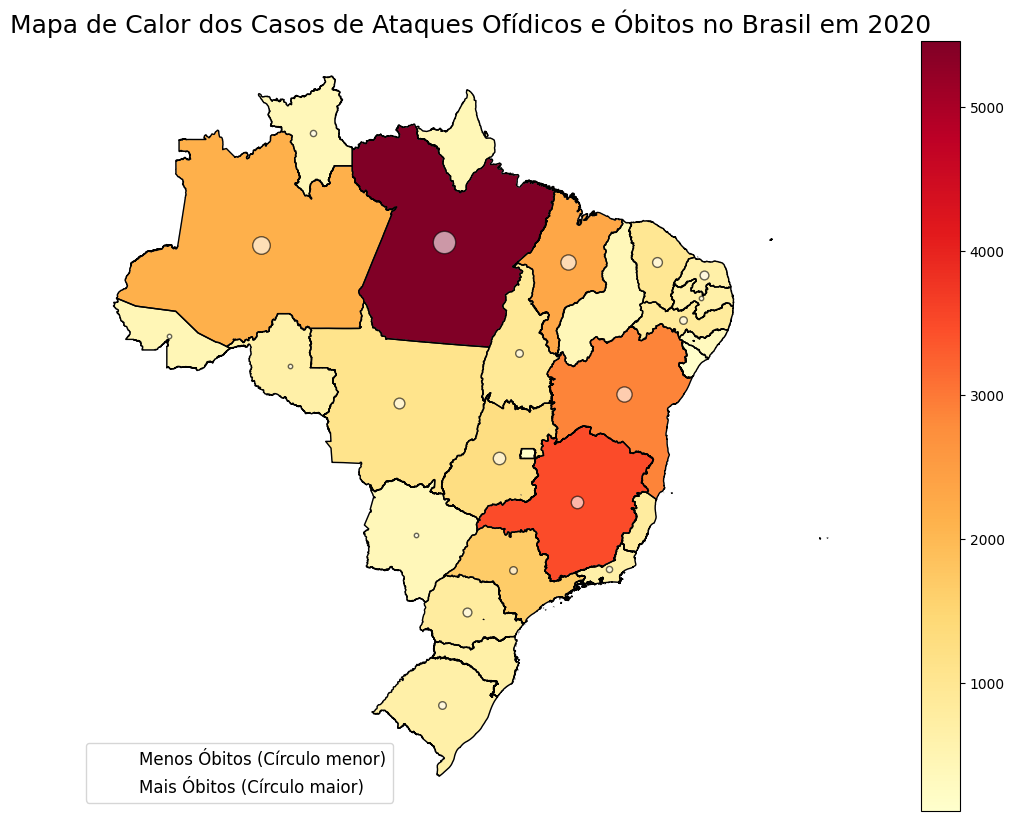

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, get_cmap
from matplotlib.lines import Line2D

# Carregar os dados do arquivo Excel
excel_file = '/content/Brasil Shape/Casos e óbitos.xlsx'
sheet_name = '2020'
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Carregar o shapefile do Brasil
brasil_shapefile = '/content/Brasil Shape'  # Substitua pelo caminho do seu shapefile
gdf = gpd.read_file(brasil_shapefile)

# Mergir os dados com o shapefile

merged = gdf.set_index('NM_UF').join(df.set_index('Estado'))

# Definir as cores para o mapa de calor
norm = Normalize(vmin=merged['Casos'].min(), vmax=merged['Casos'].max())
cmap = get_cmap('YlOrRd')  # Mapa de cores (Yellow-Orange-Red)

# Criar a figura e o eixo
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plotar o mapa de calor
merged.plot(column='Casos', ax=ax, cmap=cmap, linewidth=0.8, edgecolor='0.8', legend=True, norm=norm)

# Adicionar os círculos para os óbitos
for idx, row in merged.iterrows():
    if row['Óbitos'] > 0:
        ax.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y,
                   s=row['Óbitos'] * 10,  # Ajuste o fator de escala conforme necessário
                   color='white', edgecolor='black', alpha=0.6, zorder=5)

# Adicionar divisões geográficas das regiões
# Definir os contornos das regiões
region_boundaries = {
    'Norte': ['Acre', 'Amazonas', 'Amapá', 'Pará', 'Roraima', 'Rondônia', 'Tocantins'],
    'Nordeste': ['Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe', 'Alagoas'],
    'Centro-Oeste': ['Goiás', 'Mato Grosso', 'Mato Grosso do Sul', 'Distrito Federal'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Adicionar os contornos das regiões
for region, states in region_boundaries.items():
    region_gdf = gdf[gdf['NM_UF'].isin(states)]
    region_gdf.boundary.plot(ax=ax, color='black', linewidth=1)

# Ajustar título e legendas
plt.title('Mapa de Calor dos Casos de Ataques Ofídicos e Óbitos no Brasil em 2020', fontsize=18)
plt.xlabel('')
plt.ylabel('')

# Ajustar a legenda
legend = ax.get_legend()
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=5, label='Menos Óbitos (Círculo menor)'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=15, label='Mais Óbitos (Círculo maior)')]

ax.legend(handles=legend_elements, loc='lower left', fontsize=12)


# Remover a borda do gráfico e eixos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Exibir o mapa
plt.show()
